# The Greenest Neighborhood in Pittsburgh

**Group:** Green Beans, Group 8

**Partners:** Advaitha Agastheeswaran, Benjamin Jackson, Alex McCulloch

### Introduction

Choosing the metric: Our group was interested in how much green space there was in the city since Pittsburgh is so populated. We knew that Pittsburgh was built with greenspace in mind (e.g., Schenley and Frick Park) and wanted to see which neighborhood was the most green. We  explored different environmentally-related metrics and datasets and ultimately chose to determine the "greenest" neighborhood by physical greenspace rather than "greenest" regarding the individual sustainability initiatives per neighborhood.

### Metrics

We used the following metrics to determine the neighborhood with the most physical greenspace...
- Greenways (natural paths that connect natural, cultural, and recreational areas)
- Trees
- Gardens

Greenways were chosen because they usually appear where natural and urban life join together. Therefore, the more of these you have, the more greenspace there will likely be.
Trees were chosen because they are the most significant contributors to green space per capita.
Gardens were chosen because they are a good point of reference to neighborhoods actively trying to incorporate more greenspace.

## Data

# Dataset 1: Greenways


**WPRDC Dataset:**  [Greenways] (https://data.wprdc.org/dataset/greenways/resource/28116520-b7d4-4895-9d4f-6b5c843a5650)

**Alex McCulloch**

### First, let's import everything that we need to organize our CSV

In [30]:
import pandas as pd
import geopandas
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Next, let's see a sample of our entire CSV file

In [222]:
# import dataset
greenways = pd.read_csv("greenways.csv", low_memory = False)

# display first 3 rows
greenways.head(3)

,_id,objectid_1,objectid,area,perimeter,greenway,greenway_i,name,acres,sqmiles,...,dpwdiv,shape_leng,date_resol,label,shape_length,shape_area,created_user,created_date,last_edited_user,last_edited_date
0,2344,1,23.0,1.858947e+06,31202.044922,0.0,4,Beechview Seldom Seen,42.675374,0.066681,...,5,31202.045653,1985-07-15T00:00:00,Beechview - Seldom Seen Greenway,14626.978183,1.858947e+06,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10
1,2345,2,0.0,1.201580e+06,26922.017578,4.0,6,Moore,27.584380,0.043101,...,5,26922.017619,2006-10-20T00:00:00,Moore Greenway,16334.131937,1.201580e+06,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10
2,2346,3,NaN,5.083942e+05,3822.361084,NaN,12,Nine Mile Run,11.671078,0.018236,...,3,NaN,2012-05-11T00:00:00,Nine Mile Run Greenway,8518.013454,5.083942e+05,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10


### Now, let's take a sample of only the data we will be working with
Below are the first ten Pittsburgh Greenways listed in the CSV displayed with with their neighborhood, label, area, and acres of greenways

In [240]:
#only show Neighborhood, Name of Greenway, Area of the Greenway, and Acreage of the Greenway
sorted_greenways = greenways.head(10)[['nhood', 'label', 'area', 'acres']]
sorted_greenways.head(10)

,nhood,label,area,acres
0,Beechview,Beechview - Seldom Seen Greenway,1.858947e+06,42.675374
1,Brookline,Moore Greenway,1.201580e+06,27.584380
2,Squirrel Hill South,Nine Mile Run Greenway,5.083942e+05,11.671078
3,Perry South,Perry South Greenway,5.581352e+05,12.812969
4,NaN,Bigelow Greenway,1.053815e+06,24.192173
5,Perry North,Observatory Hill Hollows Greenway,7.813766e+05,17.937867
6,NaN,Allegheny River Greenway,1.523838e+06,37.815402
7,South Oakland,Oakcliffe Greenway,2.226447e+05,5.111200
8,NaN,Spring Hill / Spring Garden Greenway,2.064316e+06,47.389975
9,Hazelwood,Hazelwood Greenway,2.566833e+05,3.132885


### Good. Now our data is more sorted

However, we have a problem: 
Bigelow, Allegheny River, and Spring Hill Spring Garden Greenway do not belong to a specific neighborhood in the CSV.

To fix this, we can manually add the acreage to the acreage of the neighborhood they belong to. 

Here is what we need to add to our CSV file:

- Bigelow Greenway is in Southside

- Allegheny River Greenway is in Lawrenceville 

- Spring Hill / Spring Garden Greenway is in Spring Hill/Spring Garden

In [256]:
replacement_values = {
    4: 'Southside',
    6: 'Lawrenceville',
    8: 'Spring Hill/Spring Garden'
}

for index, value in replacement_values.items():
    greenways.loc[index, 'nhood'] = value

### Now that we've made those changes, we can print and save our new updated dataframe

In [258]:
print("\nUpdated DataFrame:")

greenways.to_csv('new_greenways.csv', index=False)
greenways.to_csv('C:/Users/alexm/Downloads/Data-Visualization/new_greenways.csv', index=False)

new_greenways = pd.read_csv("new_greenways.csv", low_memory = False)
new_sorted_greenways = new_greenways.head(10)[['nhood', 'label', 'area', 'acres']]
new_sorted_greenways.head(10)


Updated DataFrame:


,nhood,label,area,acres
0,Beechview,Beechview - Seldom Seen Greenway,1.858947e+06,42.675374
1,Brookline,Moore Greenway,1.201580e+06,27.584380
2,Squirrel Hill South,Nine Mile Run Greenway,5.083942e+05,11.671078
3,Perry South,Perry South Greenway,5.581352e+05,12.812969
4,Southside,Bigelow Greenway,1.053815e+06,24.192173
5,Perry North,Observatory Hill Hollows Greenway,7.813766e+05,17.937867
6,Lawrenceville,Allegheny River Greenway,1.523838e+06,37.815402
7,South Oakland,Oakcliffe Greenway,2.226447e+05,5.111200
8,Spring Hill/Spring Garden,Spring Hill / Spring Garden Greenway,2.064316e+06,47.389975
9,Hazelwood,Hazelwood Greenway,2.566833e+05,3.132885


### Now that we have a CSV file with all of the values that we need, we can organize our data by neighborhood (nhood) and acerage (acres) in decending order

In [45]:
new_greenways = pd.read_csv("new_greenways.csv", low_memory = False)
new_greenway_acres = new_greenways.groupby("nhood").sum()['acres']
new_greenway_acres.sort_values(ascending=False)

nhood
Spring Hill/Spring Garden    47.389975
Beechview                    42.675374
Lawrenceville                37.815402
Brookline                    27.584380
Southside                    24.192173
Perry North                  17.937867
Perry South                  12.812969
Squirrel Hill South          11.671078
South Oakland                 5.111200
Hazelwood                     3.132885
Name: acres, dtype: float64

### Let's put this data into a bar graph.

Text(0, 0.5, 'Acres of Greenways')

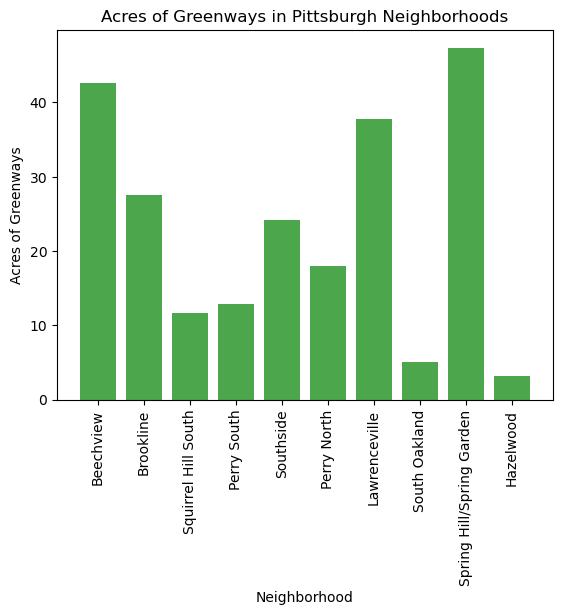

In [48]:
plt.bar(new_greenways['nhood'], new_greenways['acres'], color='green', alpha=0.7)  # creates bar graph comparing neighborhoods with acres
plt.xticks(rotation=90, ha='center') # turns x-axis labels vertical

# adds title to bar graph
plt.title("Acres of Greenways in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Acres of Greenways")

### Conclusion:
The data here shows that Spring Hill/ Spring Garden has the most greenways in Pittsburgh, making it the neighborhood with the "greenest" neighborhood, as measured by greenways alone. However, it’s important to note that this data is different from what we found in the other two CSV files, which focused on trees and gardens. Personally, I prefer to spend time in Squirrel Hill over Spring Hill, due to its many thrift stores, book shops, and vintage stores!

# Dataset 2: Trees

**WPRDC Dataset:**  [Trees] (https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da)

**Ben Jackson**

### What is the most green place in Pittsburgh?
Squirrel Hill! Here, let me prove it to you

### Here is a sample of the dataset that we will be working with. I added the colummns "area" and "growthArea" for usage later on

In [39]:
#Start by opening
data = pd.read_csv("1515a93c-73e3-4425-9b35-1cd11b2196da.csv",low_memory=False)
# Create new columns; we will use this later!
data['area'] = data['width'] * data['height']
data['growthArea'] = data["growth_space_length"] * data["growth_space_width"]
row_count = len(data)
data.head(row_count) 

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,area,growthArea
0,1,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724,0.0,20.0
1,2,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868,0.0,9801.0
2,3,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035,132.0,18.0
3,4,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276,250.0,9.0
4,5,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106,676.0,9801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,46384,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,...,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280,225.0,NaN
45705,46417,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139,NaN,NaN
45706,46418,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095,NaN,NaN
45707,46419,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062,NaN,NaN


### Next, let's filter the data to only show relevant categories, like ID, Neighborhood, Area, growthArea, and Condition

In [41]:
#Now we are going to get specfic info
specficData=data[["id","neighborhood","area","growthArea","condition" ]]
#These only show things relevent to the most greeen place
specficData.head(row_count)

,id,neighborhood,area,growthArea,condition
0,754166088,Homewood North,0.0,20.0,NaN
1,1946899269,Oakwood,0.0,9801.0,NaN
2,1431517397,South Side Flats,132.0,18.0,Fair
3,994063598,East Allegheny,250.0,9.0,Fair
4,1591838573,Highland Park,676.0,9801.0,Good
...,...,...,...,...,...
45704,39047675,Point Breeze North,225.0,NaN,Poor
45705,1827907131,Squirrel Hill North,NaN,NaN,Good
45706,1513723611,Squirrel Hill North,NaN,NaN,Good
45707,1830872418,Squirrel Hill North,NaN,NaN,Good


### Next, I made sure that the trees we were looking at were all in "Good" condition

In [43]:
#Find trees that are in good condition
filtered_data1 = specficData[specficData['condition'].isin(['Good'])]
row_count1 = len(filtered_data1)
filtered_data1.head(row_count1)

,id,neighborhood,area,growthArea,condition
4,1591838573,Highland Park,676.0,9801.0,Good
5,1333224197,Highland Park,810.0,105.0,Good
6,239290336,Highland Park,32.0,297.0,Good
7,1233652274,Highland Park,270.0,90.0,Good
8,1477030894,Highland Park,420.0,9.0,Good
...,...,...,...,...,...
45702,1131523343,Westwood,NaN,NaN,Good
45705,1827907131,Squirrel Hill North,NaN,NaN,Good
45706,1513723611,Squirrel Hill North,NaN,NaN,Good
45707,1830872418,Squirrel Hill North,NaN,NaN,Good


### After finding that useful information, we need to cut it down. 

### For this, we will be filtering area > 2000 and growthArea > 3000 because these values can be found in very few rows of the data set. 

### We are doing area first because finding the most green area is our goal.

In [171]:
#Sort Values by area over 3000
filtered_data2 = filtered_data1[filtered_data1['area'] >= 2000]
# We use area two take height and width and make one value
filtered_data2.sort_values(by='area', ascending=False)

,id,neighborhood,area,growthArea,condition
4776,1069435308,Highland Park,4550.0,495.0,Good
24583,1640744257,Point Breeze,4400.0,9801.0,Good
28331,1265952257,Squirrel Hill South,4224.0,60.0,Good
5491,1708300223,Banksville,3900.0,9801.0,Good
6037,2091763388,Point Breeze,3150.0,9801.0,Good
31422,1153653209,Point Breeze,3000.0,9801.0,Good
45255,1062170886,Elliott,2925.0,150.0,Good
21178,215748053,Squirrel Hill North,2925.0,9801.0,Good
29291,198348993,Point Breeze,2850.0,9801.0,Good
29735,1244265737,Squirrel Hill North,2800.0,9801.0,Good


In [48]:
#Sort Values by growth space >3000
filtered_data3 = filtered_data2[filtered_data2['growthArea'] >= 3000]
# We use 3000 because looking at the previous data, the ones under it are outliers 
filtered_data3.sort_values(by='area', ascending=False)

,id,neighborhood,area,growthArea,condition
24583,1640744257,Point Breeze,4400.0,9801.0,Good
5491,1708300223,Banksville,3900.0,9801.0,Good
6037,2091763388,Point Breeze,3150.0,9801.0,Good
31422,1153653209,Point Breeze,3000.0,9801.0,Good
21178,215748053,Squirrel Hill North,2925.0,9801.0,Good
29291,198348993,Point Breeze,2850.0,9801.0,Good
29735,1244265737,Squirrel Hill North,2800.0,9801.0,Good
24601,454620727,Point Breeze,2635.0,9801.0,Good
29276,830019210,Point Breeze,2625.0,9801.0,Good
11045,1293696578,Highland Park,2470.0,9801.0,Good


In [50]:
# Find total trees in new data set
total_unique_ = filtered_data3.size
print(f'Total Trees in data set: {total_unique_}')

Total Trees in data set: 165


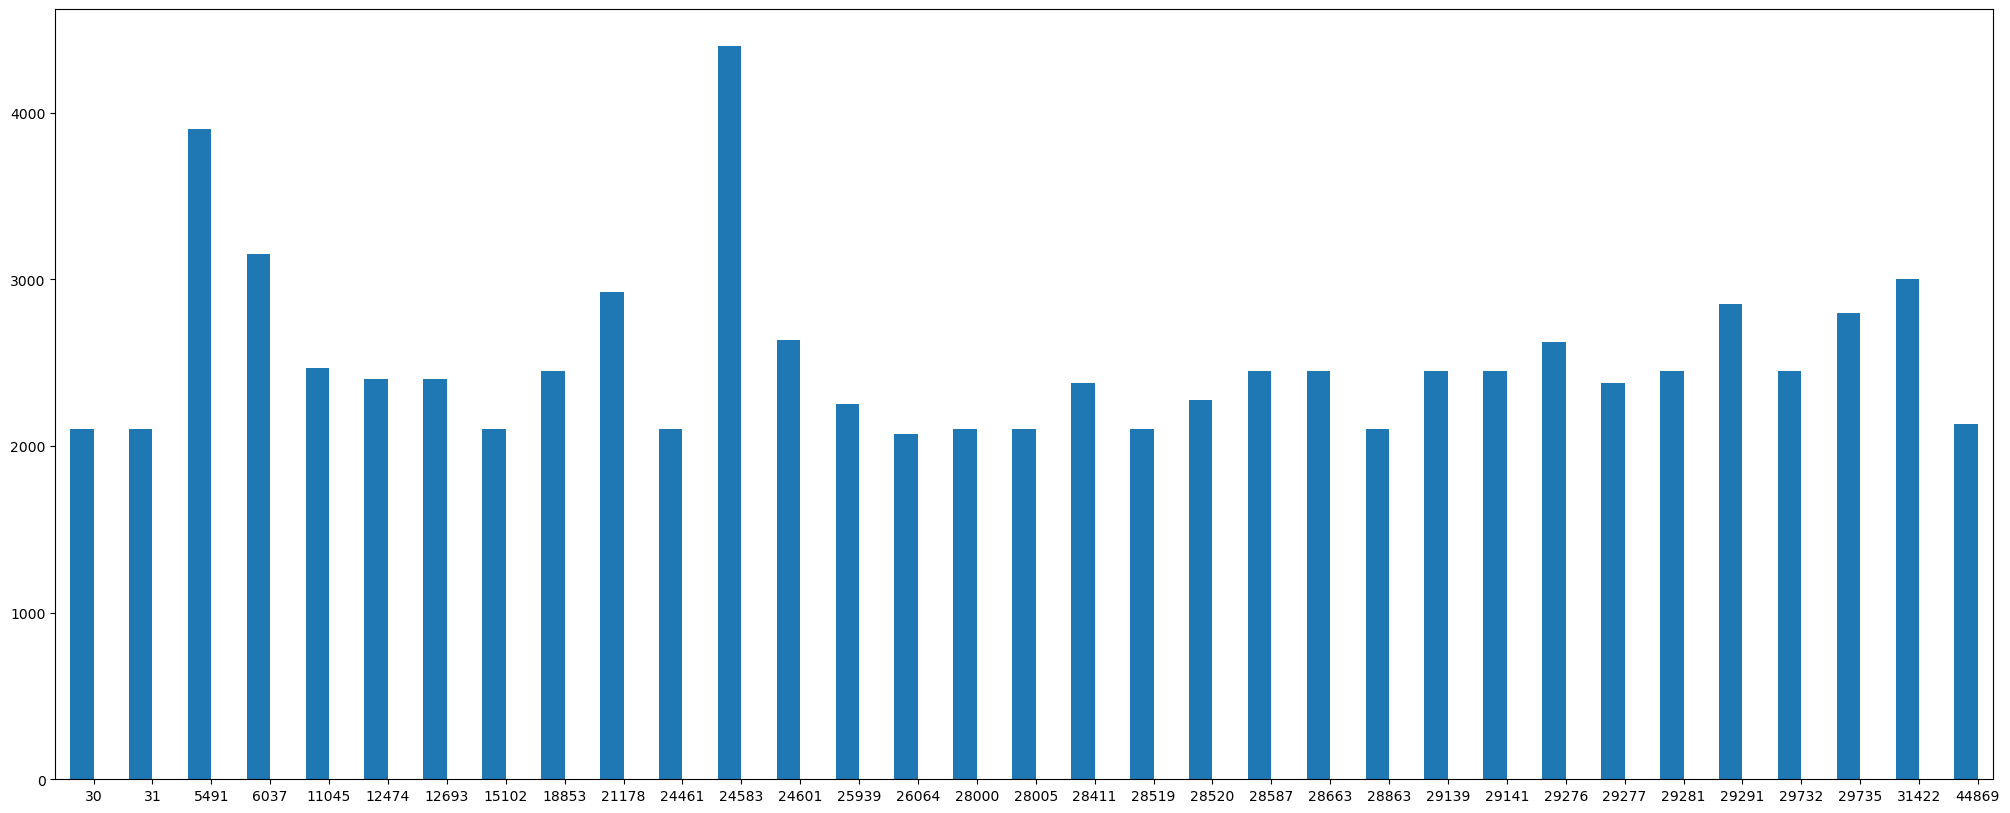

In [52]:
# Lets see our new cut down data set
filtered_data3['area'].plot.bar ( width = .4, figsize=(25,10), position=1, rot=0)
plt.show()

### Now we can see how many trees we are working with. The next step is to organize them by the neighborhood they belong to. 

In [54]:
neighborhood_counts = filtered_data3['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.rename('count')
print(neighborhood_counts)
#Find total Neighborhoods
total_unique_trees = neighborhood_counts.size
print(f'Total Neighborhoods in new data set: {total_unique_trees}')

neighborhood
Point Breeze           11
Squirrel Hill North    11
Regent Square           3
Sheraden                2
Swisshelm Park          2
Squirrel Hill South     2
Banksville              1
Highland Park           1
Name: count, dtype: int64
Total Neighborhoods in new data set: 8


### From this dataset, we can see that the majority of the trees in our dataset belong to Point Breeze and Squirrel Hill. 

### Let's visualize this data using a bar graph:

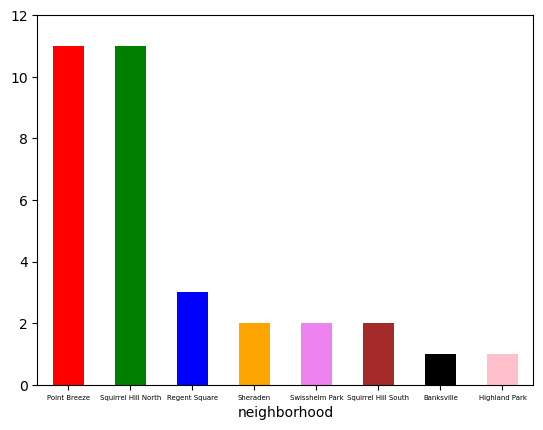

In [56]:
neighborhood_counts.plot.bar(rot=0, ylim =(0,12), color=['red', 'green', 'blue', 'orange','violet','brown','black','pink'])
plt.xticks(fontsize=5)
plt.style.use('classic')
plt.show()

### Let's get some better insight into the data. Since Squirrel Hill and Point Breeze are tied, we must look into our data for a tie breaker. 

contains_squirrel_hill
False    20
True     13
Name: count, dtype: int64


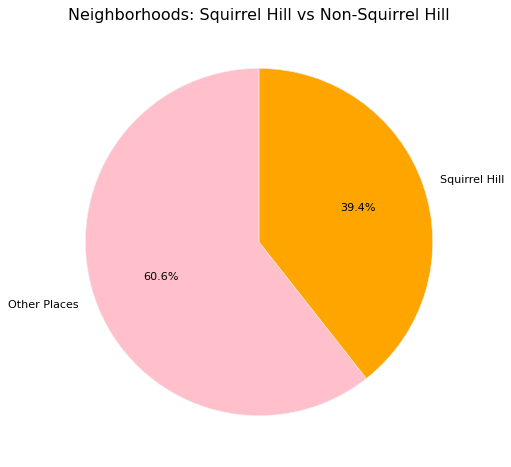

In [185]:
# How do other neighborhoods compare to Squirrel Hill?
filtered_data3.loc[:, 'contains_squirrel_hill'] = filtered_data3['neighborhood'].str.contains('Squirrel Hill')
counts = filtered_data3['contains_squirrel_hill'].value_counts()
print(counts)
# Lets use a pie chart to prove the point
plt.style.use('ggplot')
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=['Other Places', 'Squirrel Hill'], autopct='%1.1f%%', startangle=90, colors=['pink', 'orange'])
plt.title('Neighborhoods: Squirrel Hill vs Non-Squirrel Hill')
plt.show()

### Using the filtered data, we can calculate the area of tree coverage in Squirrel Hill and in Point Breeze, and come to a conclusion about the "greenest" neighborhood.

In [207]:
# filter area for Squirrel Hill and Point Breeze
SH_area = filtered_data2[filtered_data2['neighborhood'].isin(['Squirrel Hill South', 'Squirrel Hill North'])]
PB_area = filtered_data2[filtered_data2['neighborhood'].isin(['Point Breeze', 'Point Breeze North'])]

# calculate the average of the sum of 'area' column for both neighborhoods
SH_total_area = SH_area['area'].sum()
PB_total_area = PB_area['area'].sum()

# print result
print(f"The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: {SH_total_area} ft squared.")
print(f"The total tree coverage area for Point Breeze and Point Breeze North is: {PB_total_area} ft squared.")

The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: 53814.0 ft squared.
The total tree coverage area for Point Breeze and Point Breeze North is: 37685.0 ft squared.


### Conclusion:

This last graph says it all. Of the trees that have the most green in Pittsburgh, 39.4% of them are in Squirrel Hill. By comparing the tree counts in Squirrel Hill to other neighborhoods, the data confirms its significantly higher tree density. These results highlight Squirrel Hill's prominent role in contributing to Pittsburgh's green space and demonstrate its environmental value. Even though it is not the "greenest" neighborhood in Pittsburgh, my personal favorite neighborhood is Greenfield because it has Schenley Park.

# Dataset 3: Gardens

**WPRDC Dataset:** [Grow Pittsburgh Food Gardens] (https://data.wprdc.org/dataset/grow-pittsburgh-food-gardens)

**Advaitha Agastheeswaran**

### In order to access the data, I had to load the entire data set for the gardens in Pittsburgh as a csv file. I added a row_count variable to refer to rather than hard coding 80 rows

In [90]:
#loading the entire dataset for the gardens as a csv file
data2 = pd.read_csv("grow-pgh-food-gardens.csv", low_memory=False)
row_count = len(data) #adding a row_count variable to refer to rather than hard coding '80 rows'
data.head(row_count)

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,area,growthArea
0,1,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724,0.0,20.0
1,2,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868,0.0,9801.0
2,3,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035,132.0,18.0
3,4,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276,250.0,9.0
4,5,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106,676.0,9801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,46384,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,...,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280,225.0,NaN
45705,46417,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139,NaN,NaN
45706,46418,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095,NaN,NaN
45707,46419,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,...,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062,NaN,NaN


### Now that we have the dataset, we need to analyze it based on what we actually need to measure. I filtered the data down by using the variable 'filtered_data', which looks for the ID, zip code, urban grower, street address, and category rather than the entire dataset as a whole. 

### By analyzing our data, we can see that Squirrel Hill has the most gardens. We want to measure how 'green' Squirrel Hill really is by using the average area of a garden and assuming each garden is the same area in order to approximate how 'green' Squirrel Hill is..

In [285]:
# narrowed down to the specific columns that we do want
filtered_data_addy = data2[['urban_grower', 'street_address', 'zip_code', 'category']]
gardens_by_zip = filtered_data_addy.groupby('zip_code').size().reset_index(name='garden_count')
sh_zip_codes = ['15217.0', '15206.0']
sh_gardens = filtered_data_addy[filtered_data_addy['zip_code'].isin(sh_zip_codes)]
sh_garden_count = len(sh_gardens)
# to compare Squirrel Hill to all the other neighborhoods
max_garden_zip = gardens_by_zip[gardens_by_zip['garden_count'] == gardens_by_zip['garden_count'].max()]
# assume each garden has the average area in square feet
average_garden_area = 2000  
squirrel_hill_total_area = sh_garden_count * average_garden_area
print(f"Squirrel Hill has {sh_garden_count} gardens.")
print(f"Approximate square footage of garden space in Squirrel Hill: {squirrel_hill_total_area} square feet.")

Squirrel Hill has 15 gardens.
Approximate square footage of garden space in Squirrel Hill: 30000 square feet.


### We want to use the narrowed down version of the dataset with all the relevant columns to group the data based on 'zip_code' and count the number of gardens in each ZIP code. The table is in descending order of 'garden_count' so that the ZIP codes with the most gardens appear first. 

### This would show us which areas have the most square footage of gardens:

In [287]:
# Group by ZIP code and count the number of gardens
filtered_data2_addy = filtered_data_addy.groupby('zip_code').size().reset_index(name='grower_count')

# Sort ZIP codes by grower count in descending order
filtered_data2_addy = filtered_data2_addy.sort_values(by='grower_count', ascending=False)

print(filtered_data2_addy)

   zip_code  grower_count
13  15206.0            13
22  15219.0             7
18  15213.0             5
24  15221.0             5
8   15201.0             5
15  15208.0             4
26  15224.0             3
16  15210.0             3
14  15207.0             3
29  15238.0             2
23  15220.0             2
20  15217.0             2
17  15212.0             2
35      nan             2
12  15205.0             1
11  15204.0             1
34  16511.0             1
33  16441.0             1
32  16335.0             1
31  15342.0             1
30  15260.0             1
2   15106.0             1
28  15237.0             1
27  15235.0             1
3   15108.0             1
25  15223.0             1
4   15120.0             1
5   15131.0             1
6   15132.0             1
21  15218.0             1
7   15135.0             1
19  15214.0             1
1   15102.0             1
9   15202.0             1
10  15203.0             1
0   15025.0             1


### A  bar grap was created  and labeled according to the grower count and zip-code to represent the datas

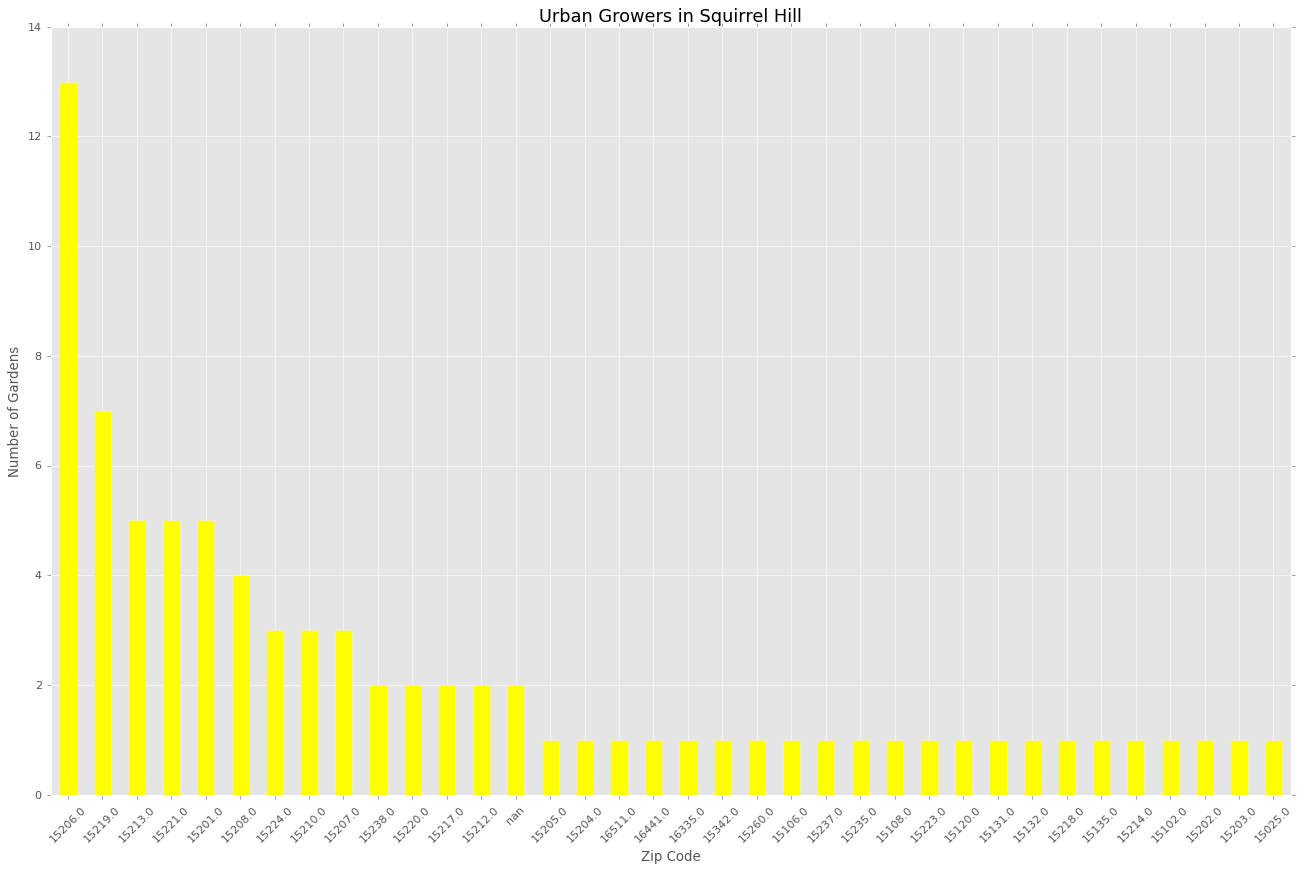

In [291]:
plot = filtered_data2_addy.plot.bar(
    x='zip_code',  #x axis
    y='grower_count', #y axis
    rot=45,  # rotate x-axis labels by 45 degrees so we can actually read each zip code
    color='yellow',  
    figsize=(20, 12),  #set the size 
    legend=False 
)

plot.set_title('Urban Growers in Squirrel Hill', fontsize=16)
plot.set_xlabel('Zip Code', fontsize=12)
plot.set_ylabel('Number of Gardens', fontsize=12)
plt.show()

### Conclusion:

The data shows that Squirrel Hill has the highest grower count of any neighborhood in Pittsburgh, with the biggest total green space. This makes it the greenest area in the city, with the most room for urban gardens and greenery. That said, I prefer Squirrel Hill for things other than it's greenspace, like its many thrift stores! 

## Conclusion

Despite Spring Hill’s strong performance with greenways, Squirrel Hill emerges as the greenest neighborhood in Pittsburgh when considering the full scope of green spaces. The data proves that the trees and gardens in Squirrel Hill provide more green areas than other neighborhoods, making it the "greenest" area overall, even when compared to Spring Hill's greenways.


### In order to get the total square ft of gardens (approximate) in Spring Hill, the CSV file for Pittsburgh Gardens was analyzed

In [318]:
# narrowed down to the specific columns that we do want
filtered_data_spring_hill = data2[['urban_grower', 'street_address', 'zip_code', 'category']]
gardens_by_zip = filtered_data_spring_hill.groupby('zip_code').size().reset_index(name='garden_count')
## zip code for spring hill
sh_zip_codes = ['15212.0']
sh_gardens = filtered_data_spring_hill[filtered_data_spring_hill['zip_code'].isin(sh_zip_codes)]
sh_garden_count = len(sh_gardens)
# to compare spring Hill to all the other neighborhoods
max_garden_zip = gardens_by_zip[gardens_by_zip['garden_count'] == gardens_by_zip['garden_count'].max()]
# assume each garden has the average area in square feet
average_garden_area = 2000  
spring_hill_total_area = sh_garden_count * average_garden_area
print(f"Spring Hill has {sh_garden_count} gardens.")
print(f"Approximate square footage of garden space in Spring Hill: {spring_hill_total_area} square feet.")

Spring Hill has 2 gardens.
Approximate square footage of garden space in Spring Hill: 4000 square feet.


### Square ft were translated into acres to have a more relevant number for the concluding bar graphs

In [358]:
spring_hill_garden_acres = spring_hill_total_area / 43560
print(f"Approximate acres of garden area in Spring Hill: {spring_hill_garden_acres} acres")

squirrel_hill_garden_acres = squirrel_hill_total_area / 43560
print(f"Approximate acres of garden area in Spring Hill: {squirrel_hill_garden_acres} acres")

Approximate acres of garden area in Spring Hill: 0.09182736455463728 acres
Approximate acres of garden area in Spring Hill: 0.6887052341597796 acres


### The acreage of tree coverage in Squirrel Hill and Spring Hill was calculated based on the filtered dataset regarding trees in Pittsburgh

In [351]:
average_tree_in = 46
average_tree_acres_ = average_tree_in / 627240

# tree area (sq ft) in Squirrel Hill and Squirrel Hill North, according to the filtered dataset 
SqH_total_area = SH_area['area'].sum()

# tree area (sq ft) in Spring Hill, according to the filtered dataset
SpH_area = filtered_data2[filtered_data2['neighborhood'].isin(['Spring Hill-City View'])]
SpH_total_area = SpH_area['area'].sum()

print(f"The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: {SqH_total_area} ft squared.")
print(f"The total tree coverage area for Spring Hill is: {SpH_total_area} ft squared.")

# calculate acerage based of sq ft
SqH_acreage = SqH_total_area / 43560
SpH_acreage = SpH_total_area / 43560

print()
print(f"The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: {SqH_acreage} acres.")
print(f"The total tree coverage area for Spring Hill is: {SpH_acreage} acres.")


The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: 53814.0 ft squared.
The total tree coverage area for Spring Hill is: 0.0 ft squared.

The total tree coverage area for Squirrel Hill South and Squirrel Hill North is: 1.2353994490358127 acres.
The total tree coverage area for Spring Hill is: 0.0 acres.


### Below is a bar graph that shows the total area of trees, gardens, and greenways in Spring Hill vs. Squirrel Hill to prove the conclusion that Squirrel Hill is greener than Spring Hill, and greenenst overall.

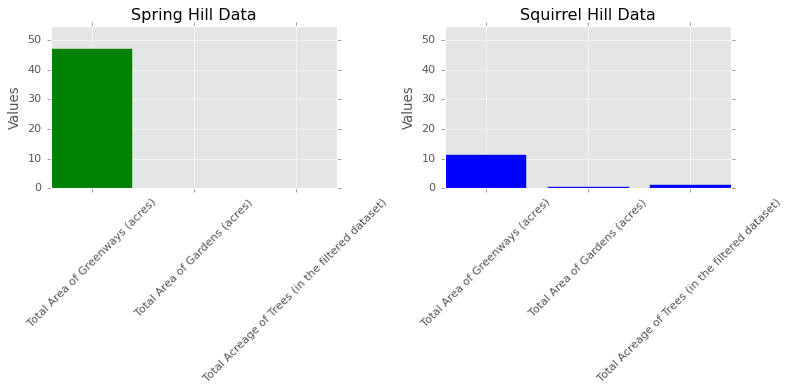

In [362]:
# data for Spring Hill
spring_hill_data = {
    'Total Area of Greenways (acres)': 47.389975,
    'Total Area of Gardens (acres)': spring_hill_garden_acres,
    'Total Acreage of Trees (in the filtered dataset)': SpH_acreage
}

# data for Squirrel Hill
squirrel_hill_data = {
    'Total Area of Greenways (acres)': 11.671078,
    'Total Area of Gardens (acres)': squirrel_hill_garden_acres,
    'Total Acreage of Trees (in the filtered dataset)': SqH_acreage
}

# bar graph for Spring Hill
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # (rows, cols, panel number)
plt.bar(spring_hill_data.keys(), spring_hill_data.values(), color='green')
plt.title('Spring Hill Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.ylim(0, 55)

# bar graph for Squirrel Hill
plt.subplot(1, 2, 2)  # (rows, cols, panel number)
plt.bar(squirrel_hill_data.keys(), squirrel_hill_data.values(), color='blue')
plt.title('Squirrel Hill Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.ylim(0, 55)

# show the plot
plt.tight_layout()
plt.show()
